In [1]:
# importer le notebook des fonctions utiles et des importations nécessaires
import nbimporter
from functions_and_imports import *

c:\Users\adri\Desktop\sepsis_prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('data/df_12H_imputed_with_knn.csv')
display_basic_info(data)

Shape of the DataFrame: (52536, 39)

Number of unique patients: 4378

SepsisLabel class counts:
 SepsisLabel
0.0    39402
1.0    13134
Name: count, dtype: int64

Number of unique patients per class in 'will_have_sepsis':
 will_have_sepsis
0.0    2189
1.0    2189
Name: Patient_ID, dtype: int64

Columns in the DataFrame:
 Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'TroponinI', 'Hct', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'SepsisLabel', 'Patient_ID',
       'will_have_sepsis'],
      dtype='object')

Data Types:
 Hour                float64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP         

In [3]:
data.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'TroponinI', 'Hct', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'SepsisLabel', 'Patient_ID',
       'will_have_sepsis'],
      dtype='object')

In [4]:
results = []

# split
train_df, test_df = split_train_test_data_v2(data)

print(f"With all columns:")
# Extraction de séquences et normalisation
normalize_sequences_train, labels_train, normalize_sequences_test, labels_test, scaler = extract_sequences_and_normalize(train_df, test_df, exclude_columns=['Patient_ID', 'Hour', 'SepsisLabel'], drop_column ='will_have_sepsis', label_column='SepsisLabel', id_column='Patient_ID', time_column='Hour', sequence_length=6)

# Reshape pour ajouter une dimension de canal pour le CNN
X_train = normalize_sequences_train.reshape(-1, 6, 35, 1)
X_val = normalize_sequences_test.reshape(-1, 6, 35, 1)

input_shape = (6, 35, 1)


With all columns:


c:\Users\adri\Desktop\sepsis_prediction\functions_and_imports.py:565: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=drop_column, inplace=True)
c:\Users\adri\Desktop\sepsis_prediction\functions_and_imports.py:566: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=drop_column, inplace=True)


In [8]:

model_cnn, history_cnn = build_and_train_cnn_model(X_train, labels_train, X_val, labels_test, input_shape)

plot_training_history(history_cnn)

predict_prob, predict = evaluate_model_performance(model_cnn, normalize_sequences_test, labels_test)

results.append((model_cnn, history_cnn, predict_prob, predict))

for col in data.columns:
	if col not in ['Patient_ID', 'Hour', 'SepsisLabel', 'will_have_sepsis']:

		train_df, test_df = split_train_test_data_v2(data)

		print(f"Without column {col}:")
		# Extraction de séquences et normalisation
		normalize_sequences_train, labels_train, normalize_sequences_test, labels_test, scaler = extract_sequences_and_normalize(train_df, test_df, exclude_columns=['Patient_ID', 'Hour', 'SepsisLabel', col], drop_column ='will_have_sepsis', label_column='SepsisLabel', id_column='Patient_ID', time_column='Hour', sequence_length=6)

		# Reshape pour ajouter une dimension de canal pour le CNN
		X_train = normalize_sequences_train.reshape(-1, 6, 34, 1)
		X_val = normalize_sequences_test.reshape(-1, 6, 34, 1)

		input_shape = (6, 34, 1)
		model_cnn, history_cnn = build_and_train_cnn_model(X_train, labels_train, X_val, labels_test, input_shape)

		plot_training_history(history_cnn)

		predict_prob, predict = evaluate_model_performance(model_cnn, normalize_sequences_test, labels_test)

		results.append((model_cnn, history_cnn, predict_prob, predict))

Epoch 1/300


KeyboardInterrupt: 

In [5]:
import pickle


In [10]:

with open('CNN_feature_comparison_results.pickle', 'wb') as handle:
	pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [6]:

with open('CNN_feature_comparison_results.pickle', 'rb') as handle:
	results_from_pickle = pickle.load(handle)
	results = results_from_pickle


In [38]:
train_df, test_df = split_train_test_data_v2(data)

normalize_sequences_train, labels_train, normalize_sequences_test, labels_test, scaler = extract_sequences_and_normalize(train_df, test_df, exclude_columns=['Patient_ID', 'Hour', 'SepsisLabel'], drop_column ='will_have_sepsis', label_column='SepsisLabel', id_column='Patient_ID', time_column='Hour', sequence_length=6)

formatted_results = {'base': {'model': results[0][0], 'history': results[0][1], 'predict_prob': results[0][2], 'predict': results[0][3], 'normalize_sequences_test': normalize_sequences_test, 'labels_test': labels_test}}
i=1


for col in data.columns:
	if col not in ['Patient_ID', 'Hour', 'SepsisLabel', 'will_have_sepsis']:

		train_df, test_df = split_train_test_data_v2(data)

		_, labels_train, normalize_sequences_test_tmp, labels_test_tmp, _ = extract_sequences_and_normalize(train_df, test_df, exclude_columns=['Patient_ID', 'Hour', 'SepsisLabel', col], drop_column ='will_have_sepsis', label_column='SepsisLabel', id_column='Patient_ID', time_column='Hour', sequence_length=6)

		formatted_results[col] = {'model': results[i][0],
                            'history': results[i][1],
                            'predict_prob': results[i][2],
                            'predict': results[i][3],
                            'normalize_sequences_test': normalize_sequences_test_tmp,
                            'labels_test': labels_test_tmp}
		i+=1

c:\Users\adri\Desktop\sepsis_prediction\functions_and_imports.py:565: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=drop_column, inplace=True)
c:\Users\adri\Desktop\sepsis_prediction\functions_and_imports.py:566: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=drop_column, inplace=True)


IndexError: list index out of range

In [7]:
def get_model_performance(model, X_test, y_test, threshold=0.5):
    """
    Évalue les performances du modèle en affichant la précision, recall, accuracy, f1-score,
    matrice de confusion, et AUROC.

    Args:
    - model: Le modèle entraîné.
    - X_test: Les données d'entrée de test.
    - y_test: Les labels de test.
    - threshold: Le seuil de décision pour classer les prédictions (par défaut 0.5).
    """
    # Prédire les probabilités
    y_pred_proba = model.predict(X_test)

    # Binariser les prédictions en fonction du seuil
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred_proba)

    # Afficher les résultats
    return accuracy, precision, recall, f1, auroc


In [8]:
performances = [(key, get_model_performance(formatted_results[key]['model'], formatted_results[key]['normalize_sequences_test'], formatted_results[key]['labels_test'])) for key in formatted_results.keys()]

NameError: name 'formatted_results' is not defined

In [15]:
performances.sort(key= lambda x: x[1][0], reverse=True)

# Extract labels and accuracy scores
sorted_labels = [perf[0] for perf in performances]
sorted_accuracy_scores = [perf[1][0] for perf in performances]

# Plot the graph
plt.figure(figsize=(14, 10))
plt.bar(sorted_labels, sorted_accuracy_scores, color='skyblue', edgecolor='black')

y_min = min(sorted_accuracy_scores) - 0.01  # Add a small buffer below the minimum
y_max = max(sorted_accuracy_scores) + 0.01  # Add a small buffer above the maximum
plt.ylim(y_min, y_max)

plt.title("accuracy Score by feature removed (Sorted)")
plt.xlabel("feature removed")
plt.ylabel("accuracy Score")
plt.xticks(rotation=80, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'performances' is not defined

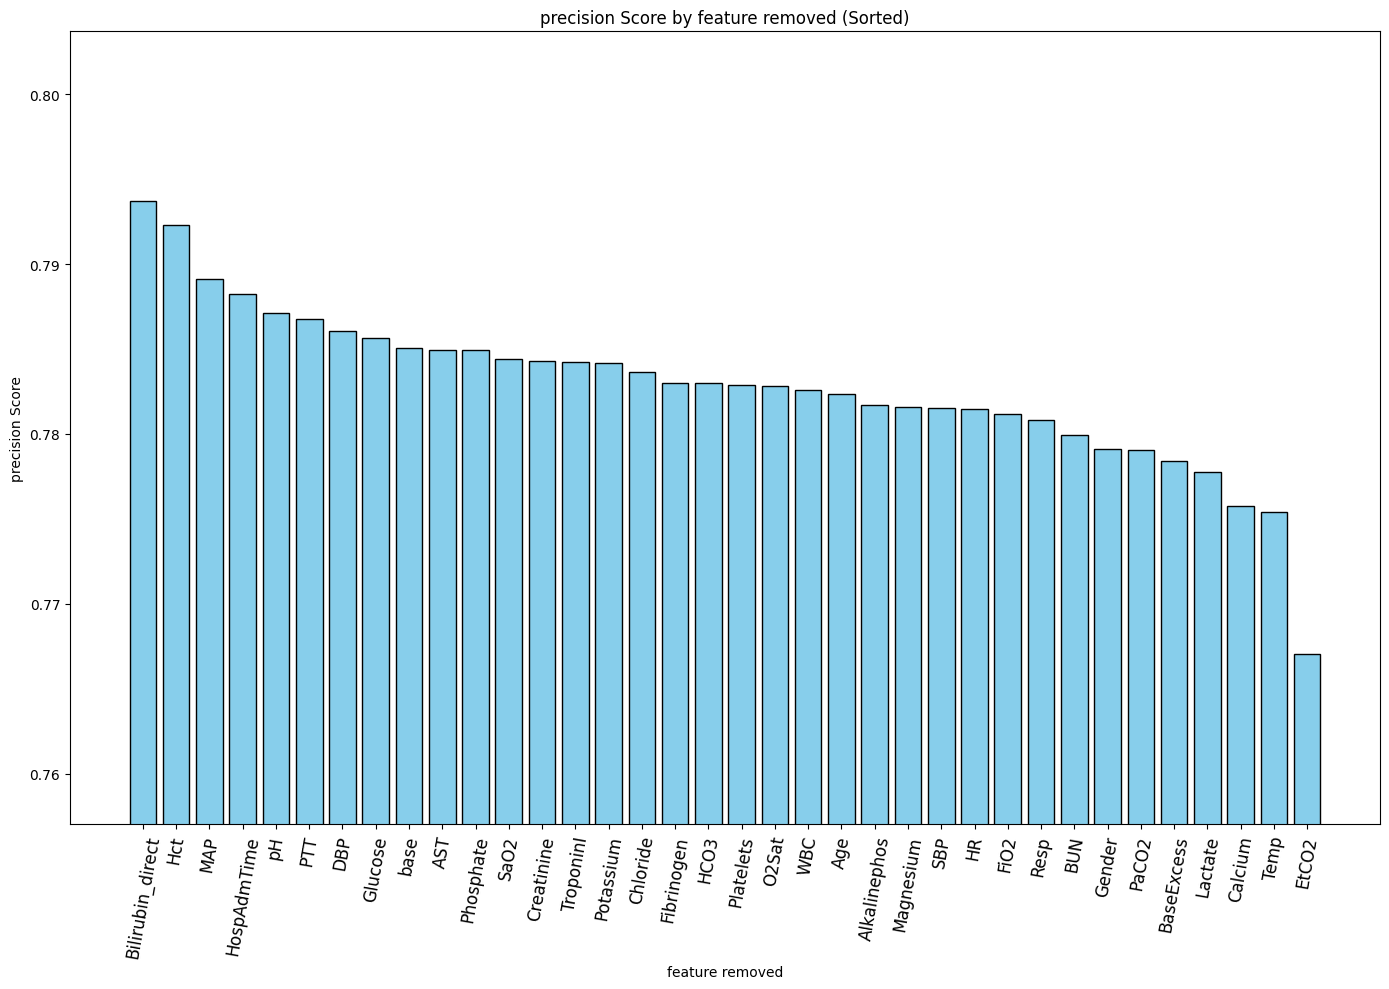

In [36]:
performances.sort(key= lambda x: x[1][1], reverse=True)

# Extract labels and precision scores
sorted_labels = [perf[0] for perf in performances]
sorted_precision_scores = [perf[1][1] for perf in performances]

# Plot the graph
plt.figure(figsize=(14, 10))
plt.bar(sorted_labels, sorted_precision_scores, color='skyblue', edgecolor='black')

y_min = min(sorted_precision_scores) - 0.01  # Add a small buffer below the minimum
y_max = max(sorted_precision_scores) + 0.01  # Add a small buffer above the maximum
plt.ylim(y_min, y_max)

plt.title("precision Score by feature removed (Sorted)")
plt.xlabel("feature removed")
plt.ylabel("precision Score")
plt.xticks(rotation=80, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

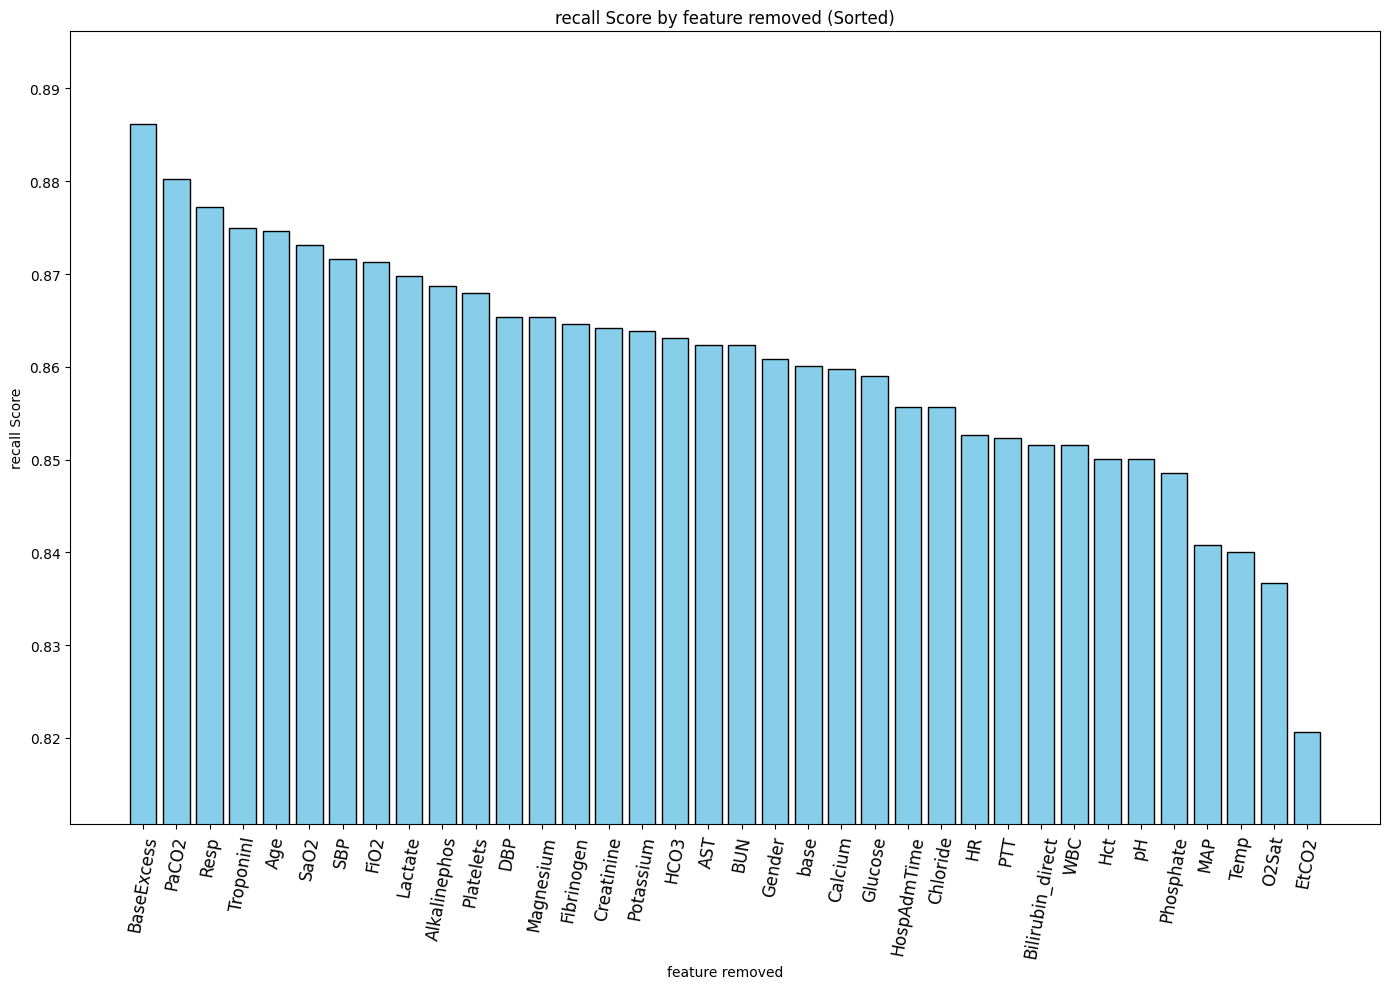

In [37]:
performances.sort(key= lambda x: x[1][2], reverse=True)


# Extract labels and recall scores
sorted_labels = [perf[0] for perf in performances]
sorted_recall_scores = [perf[1][2] for perf in performances]

# Plot the graph
plt.figure(figsize=(14, 10))
plt.bar(sorted_labels, sorted_recall_scores, color='skyblue', edgecolor='black')

y_min = min(sorted_recall_scores) - 0.01  # Add a small buffer below the minimum
y_max = max(sorted_recall_scores) + 0.01  # Add a small buffer above the maximum
plt.ylim(y_min, y_max)

plt.title("recall Score by feature removed (Sorted)")
plt.xlabel("feature removed")
plt.ylabel("recall Score")
plt.xticks(rotation=80, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

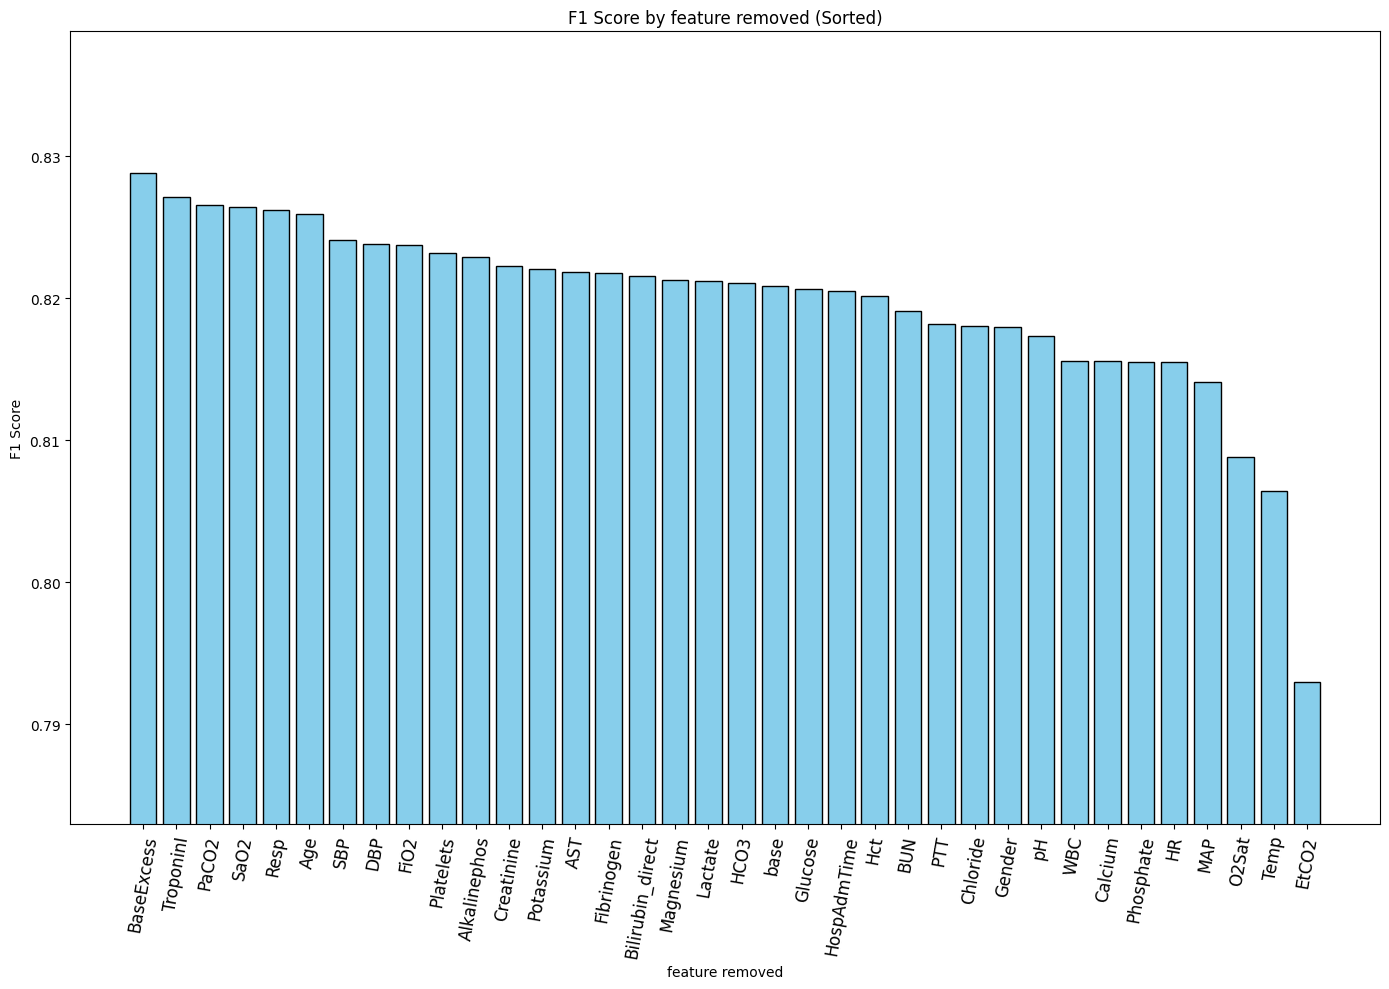

In [38]:
performances.sort(key= lambda x: x[1][3], reverse=True)


# Extract labels and f1 scores
sorted_labels = [perf[0] for perf in performances]
sorted_f1_scores = [perf[1][3] for perf in performances]

# Plot the graph
plt.figure(figsize=(14, 10))
plt.bar(sorted_labels, sorted_f1_scores, color='skyblue', edgecolor='black')

y_min = min(sorted_f1_scores) - 0.01  # Add a small buffer below the minimum
y_max = max(sorted_f1_scores) + 0.01  # Add a small buffer above the maximum
plt.ylim(y_min, y_max)

plt.title("F1 Score by feature removed (Sorted)")
plt.xlabel("feature removed")
plt.ylabel("F1 Score")
plt.xticks(rotation=80, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

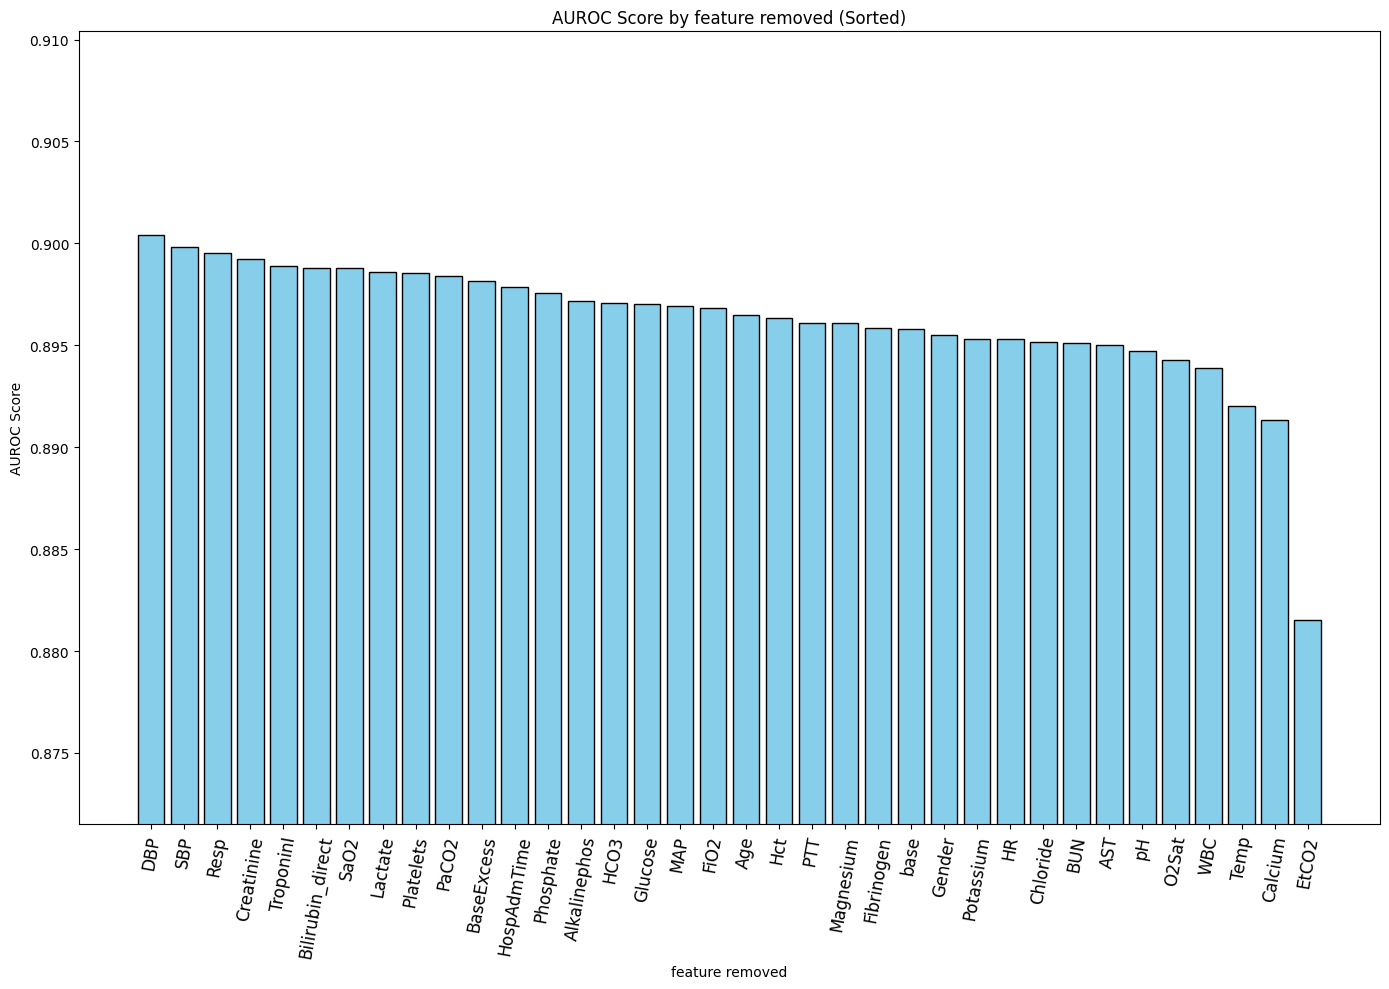

In [39]:
performances.sort(key= lambda x: x[1][4], reverse=True)

# Extract labels and auroc scores
sorted_labels = [perf[0] for perf in performances]
sorted_auroc_scores = [perf[1][4] for perf in performances]

# Plot the graph
plt.figure(figsize=(14, 10))
plt.bar(sorted_labels, sorted_auroc_scores, color='skyblue', edgecolor='black')

y_min = min(sorted_auroc_scores) - 0.01  # Add a small buffer below the minimum
y_max = max(sorted_auroc_scores) + 0.01  # Add a small buffer above the maximum
plt.ylim(y_min, y_max)

plt.title("AUROC Score by feature removed (Sorted)")
plt.xlabel("feature removed")
plt.ylabel("AUROC Score")
plt.xticks(rotation=80, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
performances.sort(key= lambda x: x[1][1], reverse=True)
for perf in performances:
    print(perf[0], "prec:", perf[1][1])

Bilirubin_direct prec: 0.7936893203883495
Hct prec: 0.7923023578363384
MAP prec: 0.7891061452513967
HospAdmTime prec: 0.7882111034955449
pH prec: 0.7871167757492249
PTT prec: 0.7867445054945055
DBP prec: 0.7860763771544441
Glucose prec: 0.7856413746172167
base prec: 0.7850594227504244
AST prec: 0.7849644429393837
Phosphate prec: 0.7849277357192016
SaO2 prec: 0.7844251336898396
Creatinine prec: 0.7842673869007427
TroponinI prec: 0.7842614204734911
Potassium prec: 0.78419452887538
Chloride prec: 0.7836456558773425
Fibrinogen prec: 0.7830188679245284
HCO3 prec: 0.7829902126223423
Platelets prec: 0.7828859060402684
O2Sat prec: 0.7828054298642534
WBC prec: 0.7825641025641026
Age prec: 0.7823627287853577
Alkalinephos prec: 0.7817207900903917
Magnesium prec: 0.7815860215053764
SBP prec: 0.7815210140093396
HR prec: 0.7814524377770201
FiO2 prec: 0.781187458305537
Resp prec: 0.7807947019867549
BUN prec: 0.7799461641991925
Gender prec: 0.7791245791245791
PaCO2 prec: 0.7790582811985513
BaseExcess 

In [41]:
histories = [formatted_results['base']['history']]
labels = ['none']
for col in data.columns:
	if col not in ['Patient_ID', 'Hour', 'SepsisLabel', 'will_have_sepsis']:
		histories.append(formatted_results[col]['history'])
		labels.append(col)

In [9]:
import matplotlib.cm as cm

def plot_n_training_histories(histories, labels = None, show_entrainement=True, show_validation=True):
	"""
	Affiche les courbes de précision et de perte pour les ensembles d'entraînement et de validation.

	Args:
	- history: Historique de l'entraînement du modèle (history object de Keras).
	"""
	# Récupérer les données de l'historique
	accuracies = [his.history['accuracy'] for his in histories]
	val_accuracies = [his.history['val_accuracy'] for his in histories]
	losses = [his.history['loss'] for his in histories]
	val_losses = [his.history['val_loss'] for his in histories]
	epochss = [range(1, len(accuracy) + 1) for accuracy in accuracies]

	num_lines = len(histories) * 2  # Total number of lines (2 per history: training and validation)
	colors = cm.get_cmap('tab20', num_lines)  # Choose a colormap with enough colors

 	# Tracé de la précision
	plt.figure(figsize=(20, 30))

	# Courbe d'accuracy
	for i in range(len(histories)):
		train_color = colors(i * 2)  # Color for training line
		val_color = colors(i * 2 + 1)  # Color for validation line
		if show_entrainement:
			plt.plot(epochss[i], accuracies[i], color=train_color, label=f'acc entr missing {labels[i] if labels is not None else i}')
		if show_validation:
			plt.plot(epochss[i], val_accuracies[i], color=val_color, label=f'acc val missing {labels[i] if labels is not None else i}')
	plt.title('Accuracy - Entraînement vs Validation par missing column')
	plt.xlabel('Épochs')
	plt.ylabel('Accuracy')
	plt.legend()
	plt.grid(True)

	# Courbe de perte (loss)
	plt.figure(figsize=(20, 30))
	for i in range(len(histories)):
		train_color = colors(i * 2)  # Color for training line
		val_color = colors(i * 2 + 1)  # Color for validation line
		if show_entrainement:
			plt.plot(epochss[i], losses[i], color=train_color, label=f'perte entr missing {labels[i] if labels is not None else i}')
		if show_validation:
			plt.plot(epochss[i], val_losses[i], color=val_color, label=f'perte val missing {labels[i] if labels is not None else i}')
	plt.title('Perte - Entraînement vs Validation')
	plt.xlabel('Épochs')
	plt.ylabel('Perte')
	plt.legend()
	plt.grid(True)

	plt.tight_layout()
	plt.show()

C:\Users\adri\AppData\Local\Temp\ipykernel_9608\2442464693.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_lines)  # Choose a colormap with enough colors


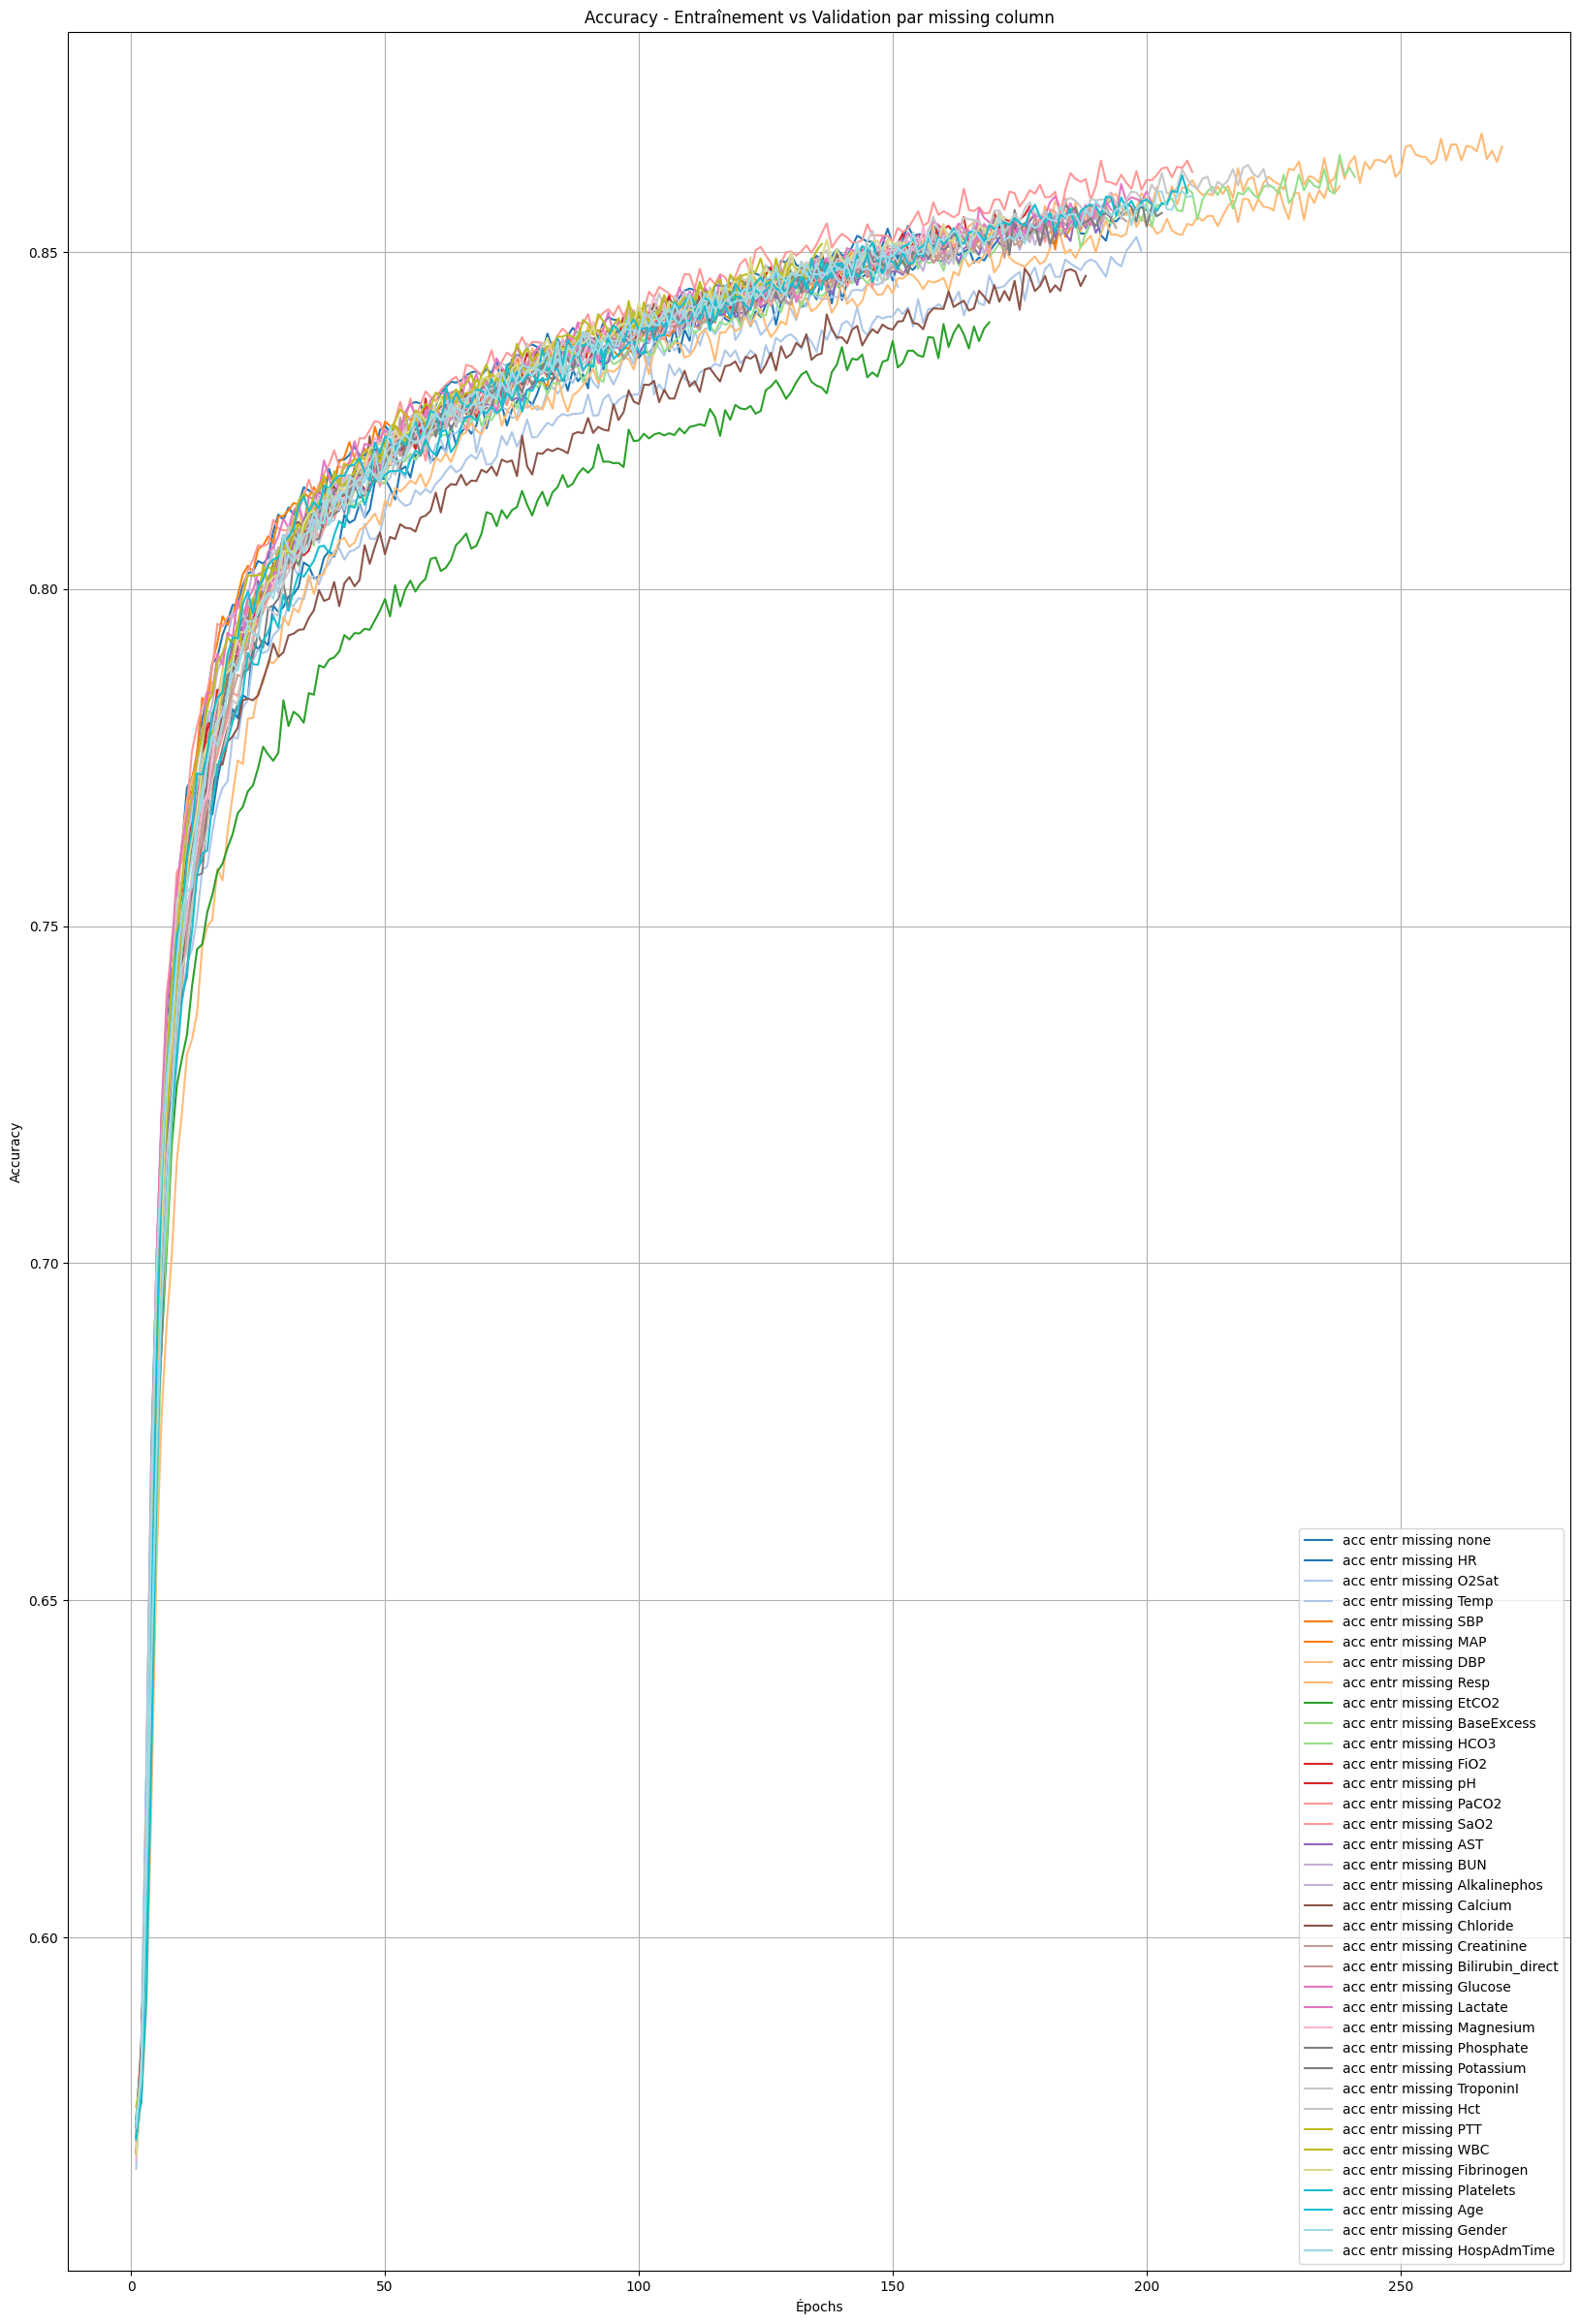

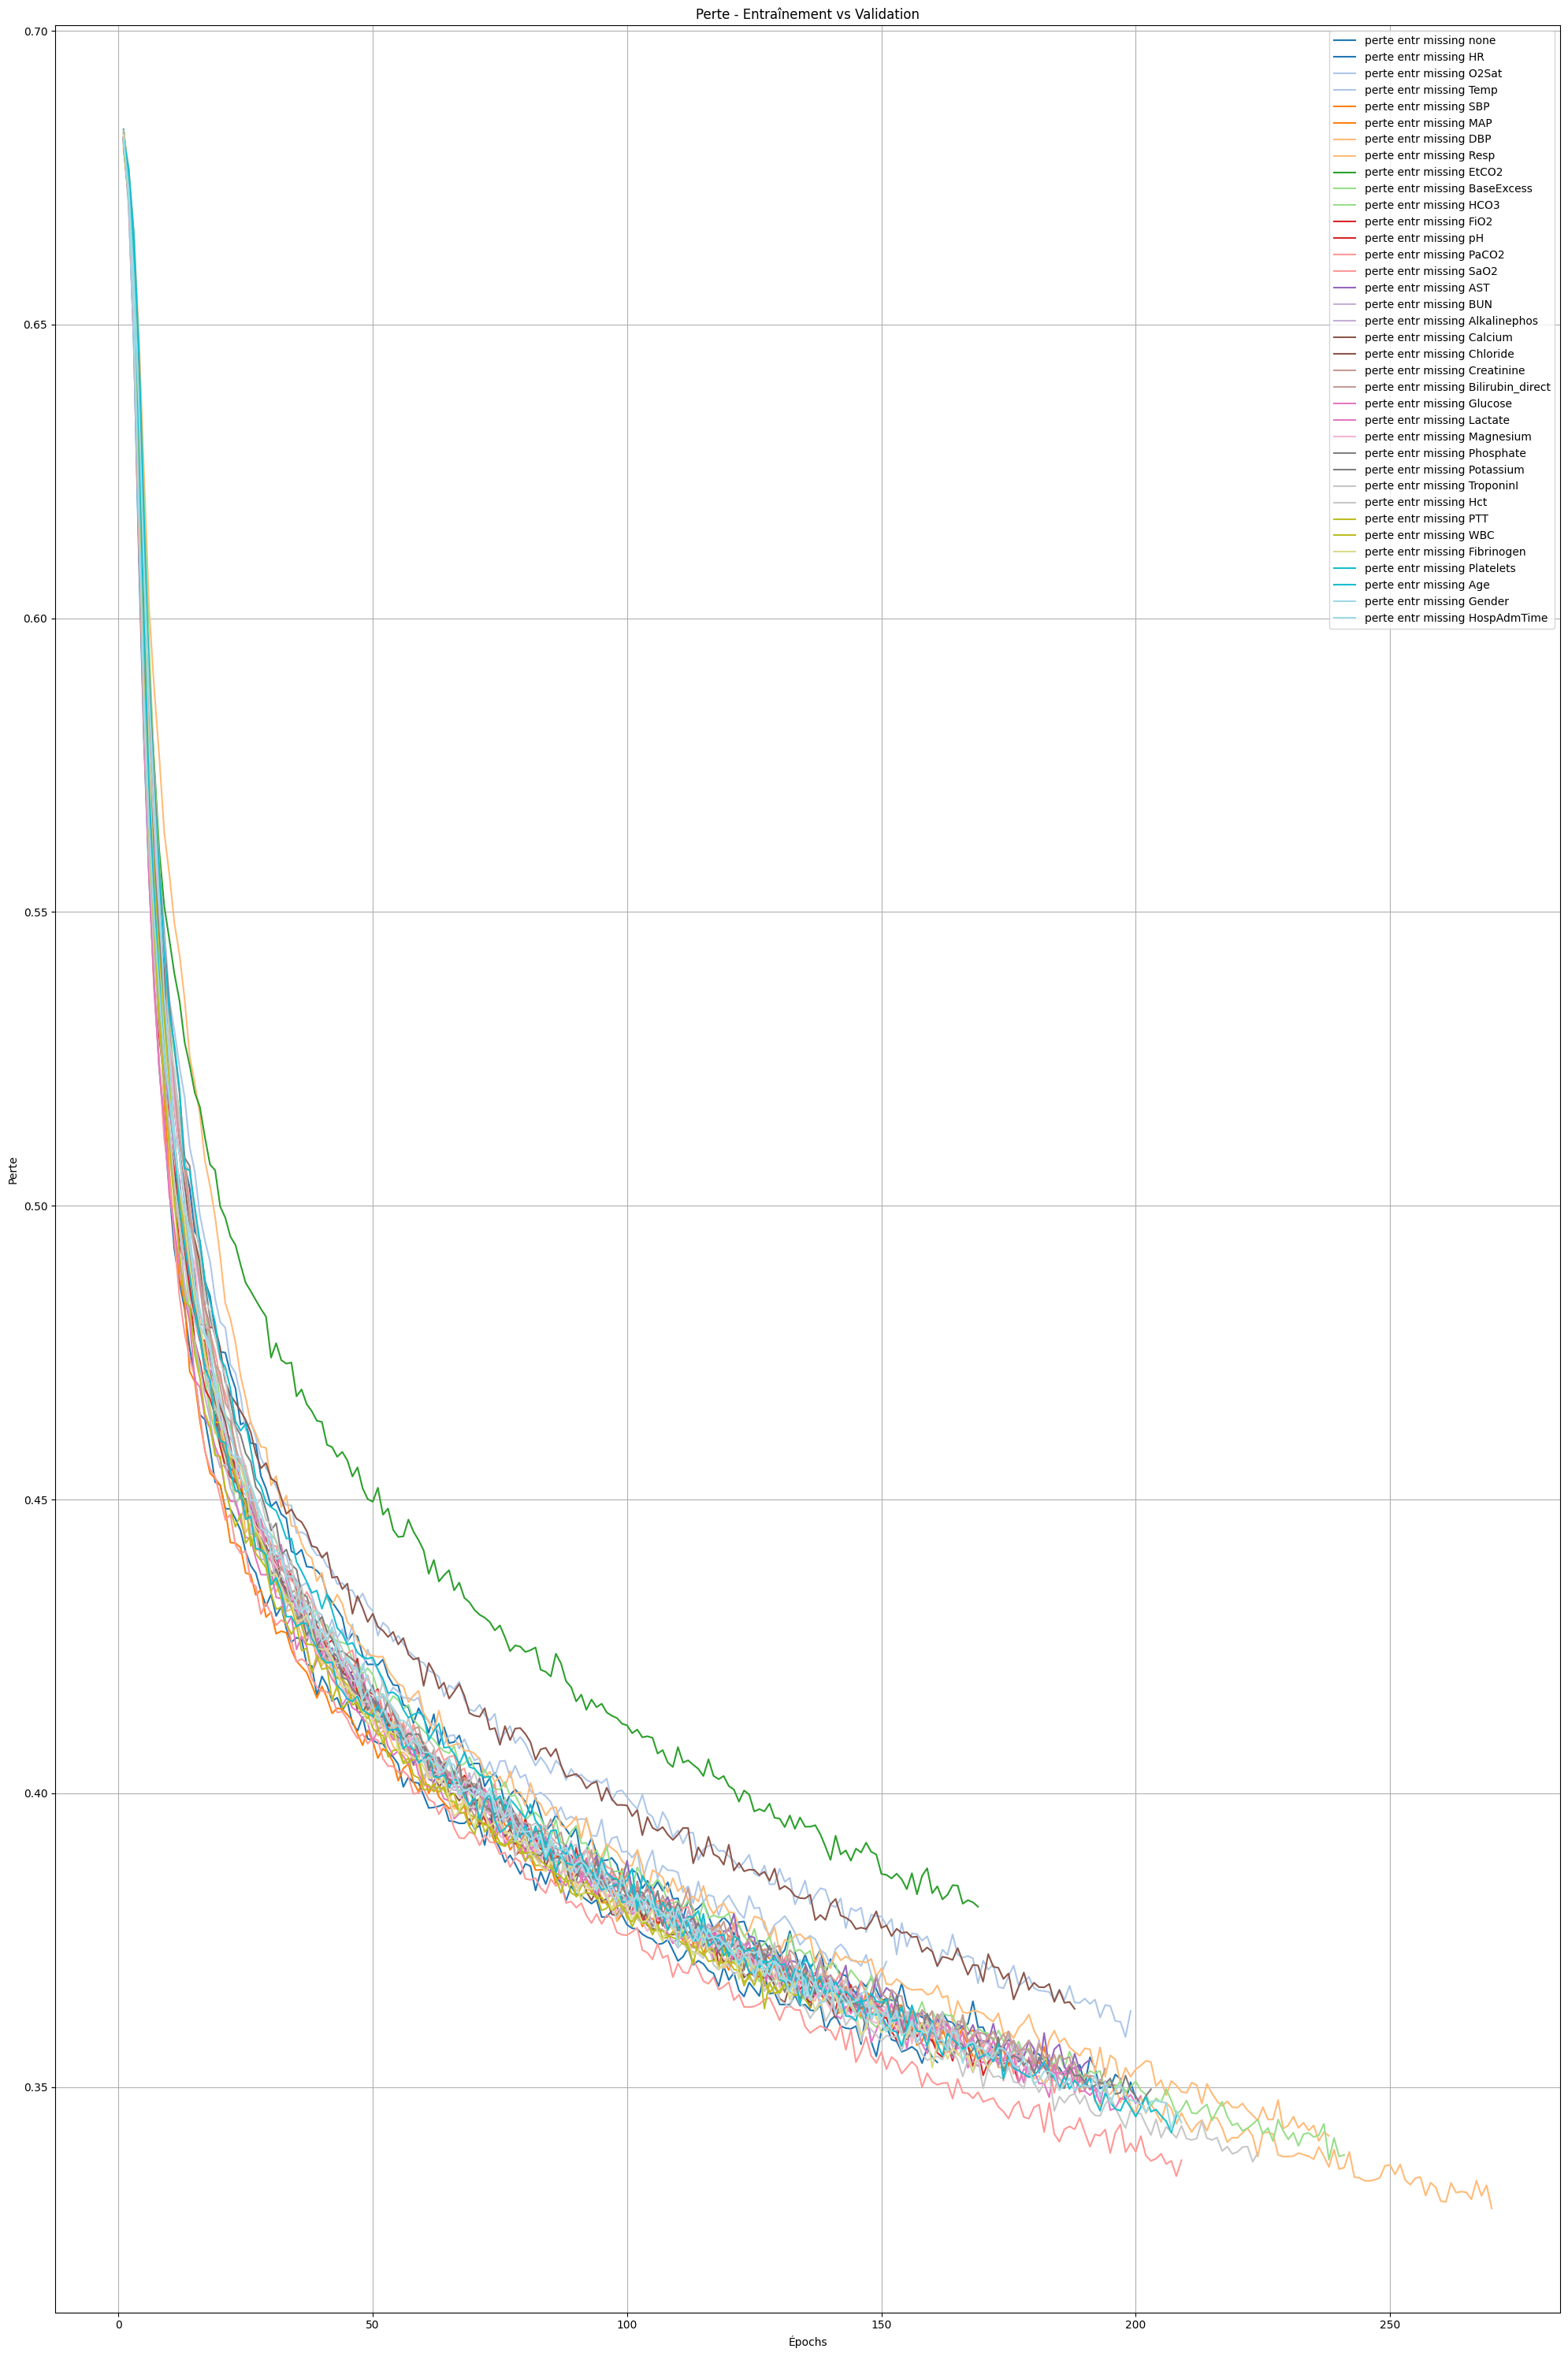

In [43]:
plot_n_training_histories(histories=histories, labels=labels, show_entrainement=True, show_validation=False)

In [10]:
import plotly.graph_objects as go

def plot_n_training_histories(histories, labels=None, show_entrainement=True, show_validation=True):
    """
    Affiche les courbes de précision et de perte pour les ensembles d'entraînement et de validation en utilisant Plotly.

    Args:
    - histories: List of Keras history objects from model training.
    - labels: List of labels for each history.
    - show_entrainement: Whether to show training data curves.
    - show_validation: Whether to show validation data curves.
    """
    # Récupérer les données de l'historique
    accuracies = [his.history['accuracy'] for his in histories]
    val_accuracies = [his.history['val_accuracy'] for his in histories]
    losses = [his.history['loss'] for his in histories]
    val_losses = [his.history['val_loss'] for his in histories]
    epochss = [range(1, len(accuracy) + 1) for accuracy in accuracies]



    # Create a Plotly figure for accuracy
    fig_accuracy = go.Figure()
    for i in range(len(histories)):
        label = labels[i] if labels is not None else f"Model {i+1}"
        if show_entrainement:
            fig_accuracy.add_trace(go.Scatter(
                x=list(epochss[i]),
                y=accuracies[i],
                mode='lines',
                name=f'no {label}, train',
                line=dict(dash='solid')
            ))
        if show_validation:
            fig_accuracy.add_trace(go.Scatter(
                x=list(epochss[i]),
                y=val_accuracies[i],
                mode='lines',
                name=f'no {label}, val',
                line=dict(dash='dot')
            ))

    fig_accuracy.update_layout(
        title="Accuracy - Entraînement vs Validation par missing column",
        xaxis_title="Épochs",
        yaxis_title="Accuracy",
        legend_title="Curves",
        template="plotly_white",
		autosize=False,
		width=1000,
		height=2000,
    )


    # Create a Plotly figure for loss
    fig_loss = go.Figure()
    for i in range(len(histories)):
        label = labels[i] if labels is not None else f"Model {i+1}"
        if show_entrainement:
            fig_loss.add_trace(go.Scatter(
                x=list(epochss[i]),
                y=losses[i],
                mode='lines',
                name=f'no {label}, train',
                line=dict(dash='solid')
            ))
        if show_validation:
            fig_loss.add_trace(go.Scatter(
                x=list(epochss[i]),
                y=val_losses[i],
                mode='lines',
                name=f'no {label}, val',
                line=dict(dash='dot')
            ))

    fig_loss.update_layout(
        title="Loss - Entraînement vs Validation",
        xaxis_title="Épochs",
        yaxis_title="Loss",
        legend_title="Curves",
        template="plotly_white",
        autosize=False,
		width=1000,
		height=2000,
    )

    # Display the figures
    fig_accuracy.show()
    fig_loss.show()


ModuleNotFoundError: No module named 'plotly'

In [121]:
plot_n_training_histories(histories=histories, labels=labels, show_validation=False, show_entrainement=True)

In [11]:
normalize_sequences_train.shape,labels_train.shape, normalize_sequences_test.shape,labels_test.shape

((24514, 6, 35), (24514,), (6132, 6, 35), (6132,))

In [12]:
# Reshape pour ajouter une dimension de canal pour le CNN
X_train = normalize_sequences_train.reshape(-1, 6, 35, 1)
X_val = normalize_sequences_test.reshape(-1, 6, 35, 1)


In [12]:
X_train.shape, X_val.shape

((24514, 6, 35, 1), (6132, 6, 35, 1))

In [13]:
labels_train.shape, labels_test.shape

((24514,), (6132,))

In [13]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_and_train_cnn_model(X_train, y_train, X_val, y_val, input_shape, epochs=300, batch_size=128):
	"""
	Construit et entraîne un modèle CNN pour la prédiction de la septicémie à partir de séquences temporelles.

	Args:
	- X_train: Séquences d'entraînement reshaped pour le CNN.
	- y_train: Labels d'entraînement.
	- X_val: Séquences de validation reshaped pour le CNN.
	- y_val: Labels de validation.
	- input_shape: Tuple représentant la forme des données d'entrée (height, width, channels).
	- epochs: Nombre d'époques d'entraînement.
	- batch_size: Taille du lot pour l'entraînement.

	Returns:
	- keras.models.Model: Modèle CNN entraîné.
	- keras.callbacks.History: Historique de l'entraînement.
	"""
	model = Sequential([
		Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
		MaxPooling2D(pool_size=(2, 2)),
		Dropout(0.25),

		Conv2D(64, (3, 3), activation='relu', padding='same'),
		MaxPooling2D(pool_size=(2, 2)),
		Dropout(0.25),

		Flatten(),
		Dense(128, activation='relu'),
		Dropout(0.5),
		Dense(1, activation='sigmoid')
	])

	model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

	# Configuration de l'arrêt prématuré
	early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=True)

	# Entraînement du modèle
	history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

	return model, history


In [15]:
input_shape = (6, 35, 1)
model_cnn, history_cnn = build_and_train_cnn_model(X_train, labels_train, X_val, labels_test, input_shape)


Epoch 1/300


c:\Users\adri\Desktop\sepsis_prediction\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5659 - loss: 0.6824 - val_accuracy: 0.5616 - val_loss: 0.6774
Epoch 2/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5786 - loss: 0.6744 - val_accuracy: 0.5841 - val_loss: 0.6638
Epoch 3/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6039 - loss: 0.6585 - val_accuracy: 0.6769 - val_loss: 0.6278
Epoch 4/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6531 - loss: 0.6294 - val_accuracy: 0.7099 - val_loss: 0.5822
Epoch 5/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6959 - loss: 0.5880 - val_accuracy: 0.7335 - val_loss: 0.5471
Epoch 6/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7178 - loss: 0.5608 - val_accuracy: 0.7500 - val_loss: 0.5245
Epoch 7/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7313 - loss: 0.5428 - val_accuracy: 0.7702 - val_loss: 0.5061
Epoch 8/300
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7519 - loss: 0.5212 - val_accuracy

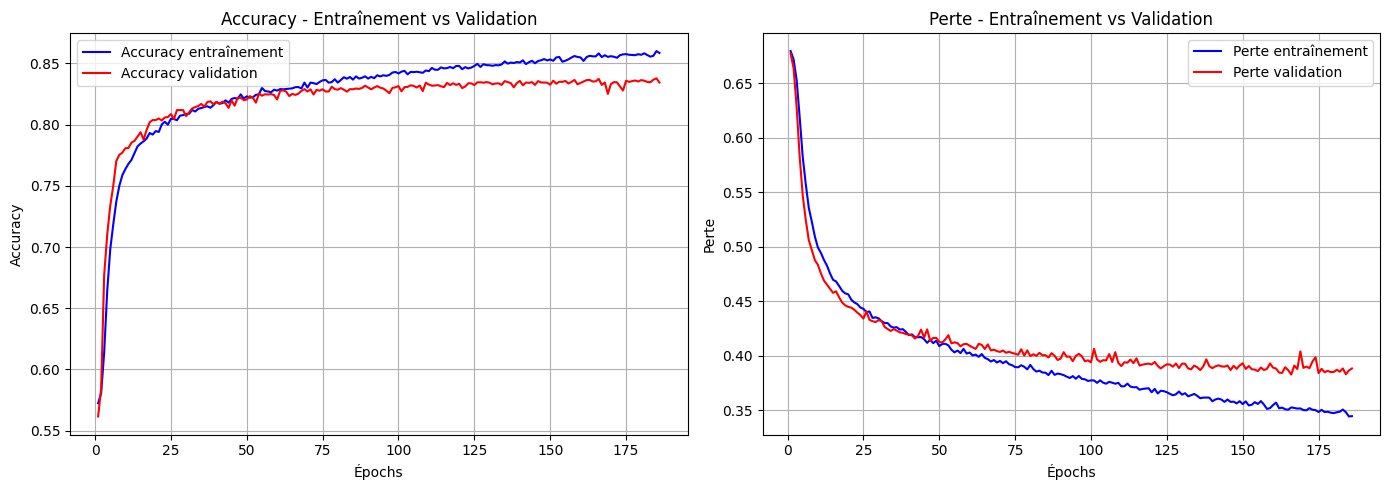

In [16]:
plot_training_history(history_cnn)

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8372
Precision: 0.7859
Recall: 0.8642
F1-Score: 0.8232
AUROC: 0.8995


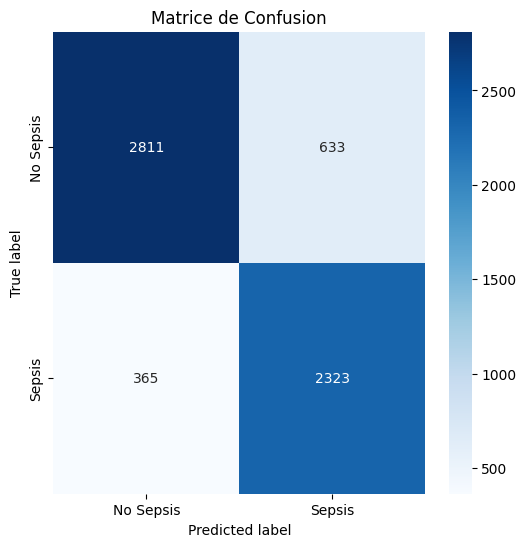

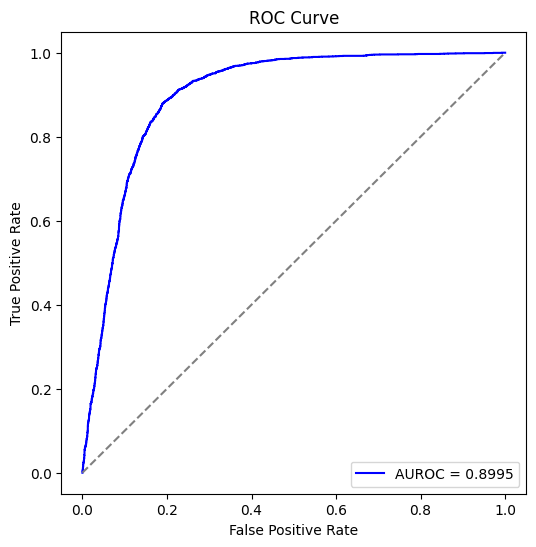

In [17]:
# Évaluer les performances du modèle sur les données de test
predict_prob, predict = evaluate_model_performance(model_cnn, normalize_sequences_test, labels_test)

In [63]:
import shap
import numpy as np

# Explain the model predictions
# Use a small subset of the training data as the background dataset
background_data = X_train[:500]  # Example: Take the first 100 samples as background

# SHAP deeep explainer
e = shap.DeepExplainer(model_cnn, background_data)

# Choose a subset of the validation data to explain
data_to_explain = X_val[:200]  # Example: Take the first 10 samples from the validation set

# Compute SHAP values
shap_values = np.array(e.shap_values(data_to_explain)).squeeze()


c:\Users\adri\Desktop\sepsis_prediction\.venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\adri\Desktop\sepsis_prediction\.venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_11
Received: inputs=['Tensor(shape=(500, 6, 35, 1))']
  warnings.warn(msg)
c:\Users\adri\Desktop\sepsis_prediction\.venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_11
Received: inputs=['Tensor(shape=(1000, 6, 35, 1))

In [65]:

with open('sauvegarde/shap_values/cnn_shap.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

In [20]:
model_cnn.save('sauvegarde/models/cnn_model.keras')

In [21]:
with open('sauvegarde/shap_values/cnn_shap.pkl', 'rb') as f:
	shap_values = pickle.load(f)

model_cnn = Sequential([
		Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(6, 35, 1)),
		MaxPooling2D(pool_size=(2, 2)),
		Dropout(0.25),

		Conv2D(64, (3, 3), activation='relu', padding='same'),
		MaxPooling2D(pool_size=(2, 2)),
		Dropout(0.25),

		Flatten(),
		Dense(128, activation='relu'),
		Dropout(0.5),
		Dense(1, activation='sigmoid')
	])
model_cnn.load_weights('sauvegarde/models/cnn_model.keras')

c:\Users\adri\Desktop\sepsis_prediction\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
shap_values.shape

(200, 6, 35)

In [23]:
data_to_explain[0][0][2]

array([0.6262069])

In [66]:
shap_values[0][0][2]

np.float64(-0.058171188649642165)

In [67]:
import matplotlib.patheffects as path_effects
import cmcrameri.cm as cmc

def draw_patient_pred(data_array, text_array, prediction, auto_scale=True, max_color_scale=0.13, text_color="black", outline_text_color=None, cmap="bwr"):
	if auto_scale:
		# Calculate the absolute max value in data_array to set symmetric color limits
		abs_max = max(abs(data_array.min()), abs(data_array.max()))
		vmin = -abs_max
		vmax = abs_max
	elif max_color_scale:
		# If max_color_scale is provided, use these values for the color limits
		vmin = -max_color_scale
		vmax = max_color_scale
	else:
		# Fallback to default behavior if neither auto_scale nor max_color_scale are specified
		abs_max = max(abs(data_array.min()), abs(data_array.max()))
		vmin = -abs_max
		vmax = abs_max

	plt.figure(figsize=(70, 6))  # Adjust the figure size as needed

	plt.title(f"Predicted sepsis: {prediction >= threshold} ({prediction})", fontsize=38)
	ax = sns.heatmap(data_array, annot=text_array, xticklabels=features, fmt=".2f",
					 annot_kws={"color": text_color, "fontsize": 22}, cmap=cmap , cbar=True,
					 cbar_kws={"shrink": 1.5, "aspect": 10, "label": "shap value (feature impact on sepsis prediction)"},
					 vmin=vmin, vmax=vmax)  # Set symmetric color limits based on abs max if auto_scale is True

	# Adjust the size of the color bar label for better readability
	ax.figure.axes[-1].yaxis.label.set_size(20)

	# outline values text
	if outline_text_color is not None:
		for text in ax.texts:  # `ax.texts` contains all annotations
			text.set_path_effects([
				path_effects.Stroke(linewidth=2, foreground=cmap),
				path_effects.Normal()  # Normal text appearance
			])

	ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=24)
	ax.xaxis.set_ticks_position("top")  # Place x-ticks on top
	ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

	plt.show()


In [68]:
def extract_sequences(test_df, exclude_columns=['Patient_ID', 'Hour', 'SepsisLabel'], label_column='SepsisLabel', id_column='Patient_ID', time_column='Hour', sequence_length=6):
	"""
	Prépare les données d'entraînement et de test pour l'extraction de séquences
	"""
	# column will_have_sepsis is dropped earlier in the notebook, so no attempt is made here.
	# Sélectionner les colonnes de caractéristiques
	feature_cols = [col for col in train_df.columns if col not in exclude_columns]

	return extract_sequences_and_labels(
		test_df, id_column, time_column, feature_cols, label_column, sequence_length
	)

In [69]:
original_sequences, _ = extract_sequences(test_df, exclude_columns=['Patient_ID', 'Hour', 'Sepsispredicted','SepsisLabel'], label_column='SepsisLabel', id_column='Patient_ID', time_column='Hour', sequence_length=6)

ex: la première valeur de tmp a un impact négatif important sur la prédiction de sepsis

In [71]:
data_to_explain.shape

(200, 6, 35, 1)

In [72]:
data_to_explain[21].reshape(6, 35)

array([[0.38253012, 0.9875    , 0.57034483, 0.28325991, 0.17625899,
        0.15876923, 0.2201087 , 0.2490566 , 0.33121019, 0.48837209,
        0.0990099 , 0.56043956, 0.375     , 0.96214511, 0.00224967,
        0.19745223, 0.04317574, 0.33658537, 0.36363636, 0.02305476,
        0.06130653, 0.16849817, 0.03125   , 0.09090909, 0.30232558,
        0.20618557, 0.04377658, 0.49712092, 0.06442105, 0.01546392,
        0.32418398, 0.48709677, 0.80024096, 0.        , 0.97168392],
       [0.36144578, 0.96875   , 0.67048276, 0.24889868, 0.07913669,
        0.12307692, 0.2201087 , 0.23396226, 0.33121019, 0.48837209,
        0.0990099 , 0.56043956, 0.37727273, 0.96214511, 0.00168726,
        0.19745223, 0.04942016, 0.3102439 , 0.36363636, 0.04149856,
        0.06130653, 0.13553114, 0.03125   , 0.09090909, 0.3255814 ,
        0.20618557, 0.04377658, 0.49712092, 0.08185263, 0.01546392,
        0.32418398, 0.28258065, 0.80024096, 0.        , 0.97168392],
       [0.35542169, 0.95      , 0.60896552, 0.

In [73]:
normalize_sequences_test.shape

(6132, 6, 35)

In [74]:
predictions = model_cnn.predict(normalize_sequences_test)

  1/192 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [75]:
original_sequences, _ = extract_sequences(test_df, exclude_columns=['Patient_ID', 'Hour', 'Sepsispredicted','SepsisLabel'], label_column='SepsisLabel', id_column='Patient_ID', time_column='Hour', sequence_length=6)

In [76]:
features = [col for col in train_df.columns if col not in ['Patient_ID', 'Hour', 'SepsisLabel', 'will_have_sepsis']]

In [77]:
shap_values_all = np.array(e.shap_values(data_to_explain)).reshape(-1, 6, 35)


c:\Users\adri\Desktop\sepsis_prediction\.venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_11
Received: inputs=['Tensor(shape=(200, 6, 35, 1))']
  warnings.warn(msg)


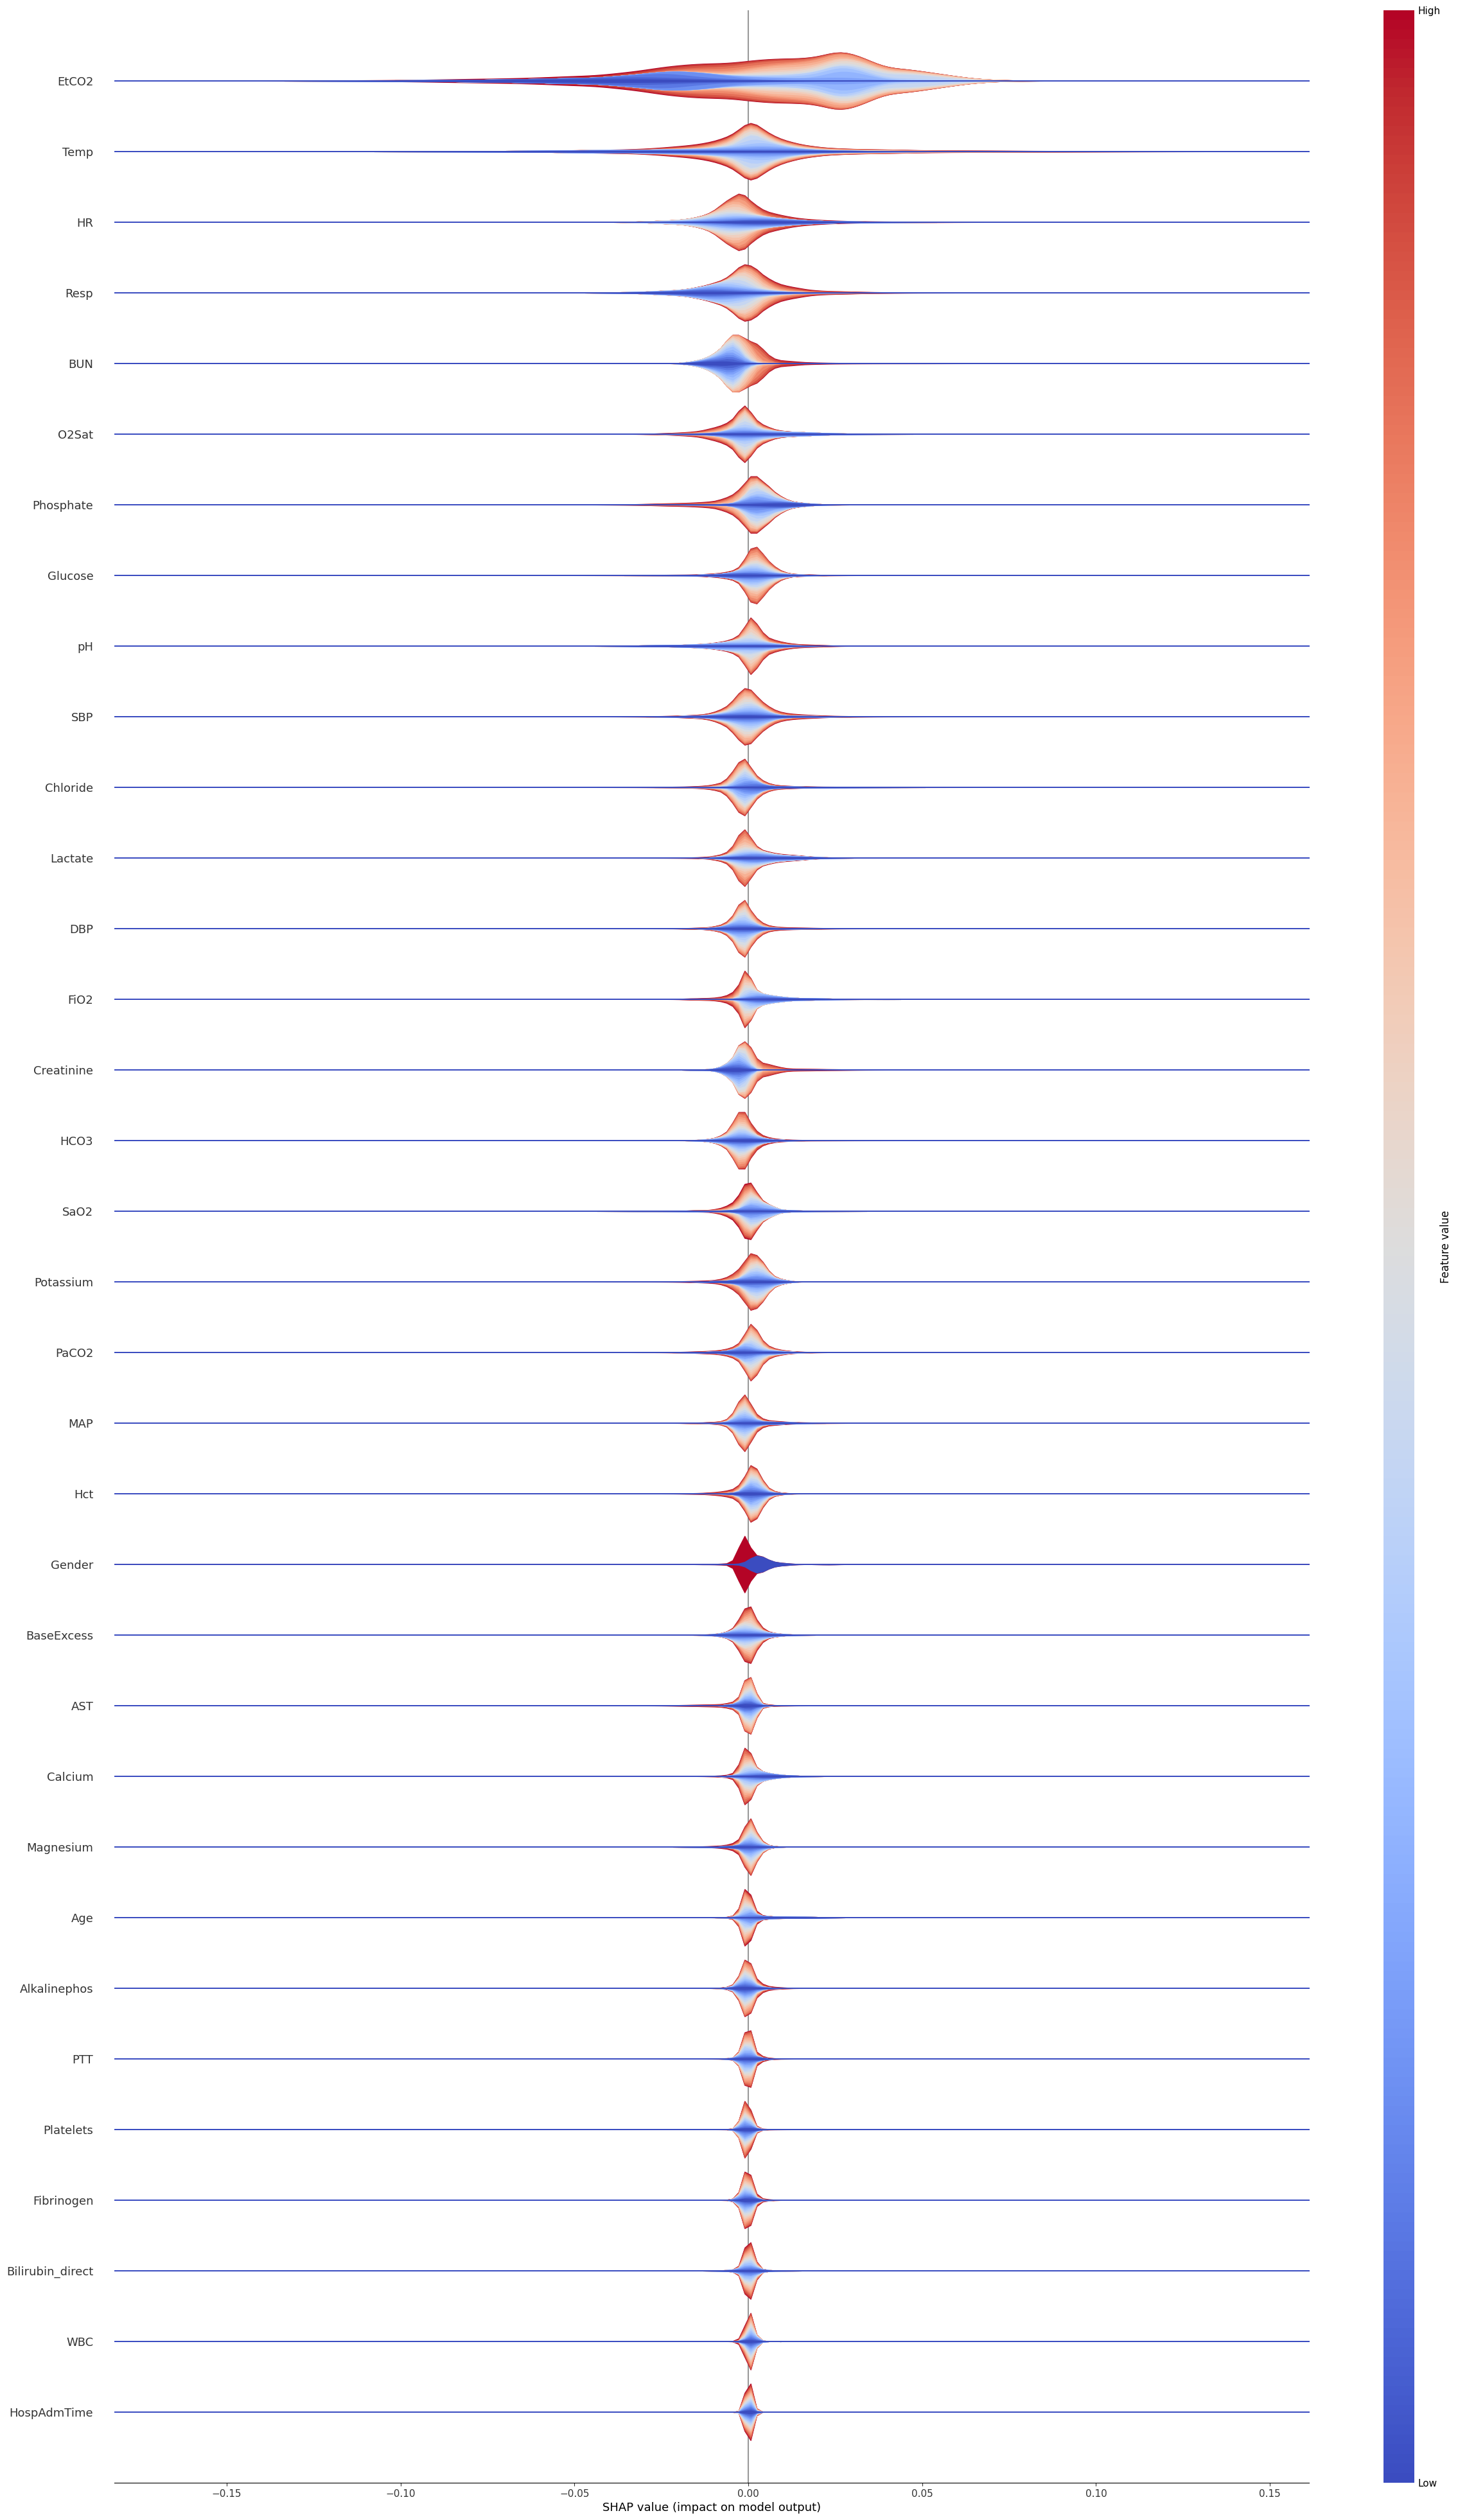

In [78]:
feature_importance_over_time = shap_values_all.reshape(-1, 35)

shap.plots.violin(feature_importance_over_time, features=original_sequences.reshape(-1, 35)[:feature_importance_over_time.shape[0]], feature_names=features, max_display=-1, plot_type="layered_violin", plot_size=(30, 50))

In [79]:
i=21
threshold = 0.7

In [80]:
predictions = predictions.reshape(-1)

In [81]:
import pickle

with open('sauvegarde/shap_values/lstm_shap.pkl', 'wb') as f:
    pickle.dump(shap_values_all, f)

model_cnn.save('sauvegarde/models/cnn_model.keras')

In [82]:
with open('sauvegarde/shap_values/cnn_shap.pkl', 'rb') as f:
	cnn_shap_values_all = pickle.load(f)

cnn_model = Sequential([
		Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(6, 35, 1)),
		MaxPooling2D(pool_size=(2, 2)),
		Dropout(0.25),

		Conv2D(64, (3, 3), activation='relu', padding='same'),
		MaxPooling2D(pool_size=(2, 2)),
		Dropout(0.25),

		Flatten(),
		Dense(128, activation='relu'),
		Dropout(0.5),
		Dense(1, activation='sigmoid')
	])
cnn_model.load_weights('sauvegarde/models/cnn_model.keras')

c:\Users\adri\Desktop\sepsis_prediction\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Patient 25, sepsis label: False


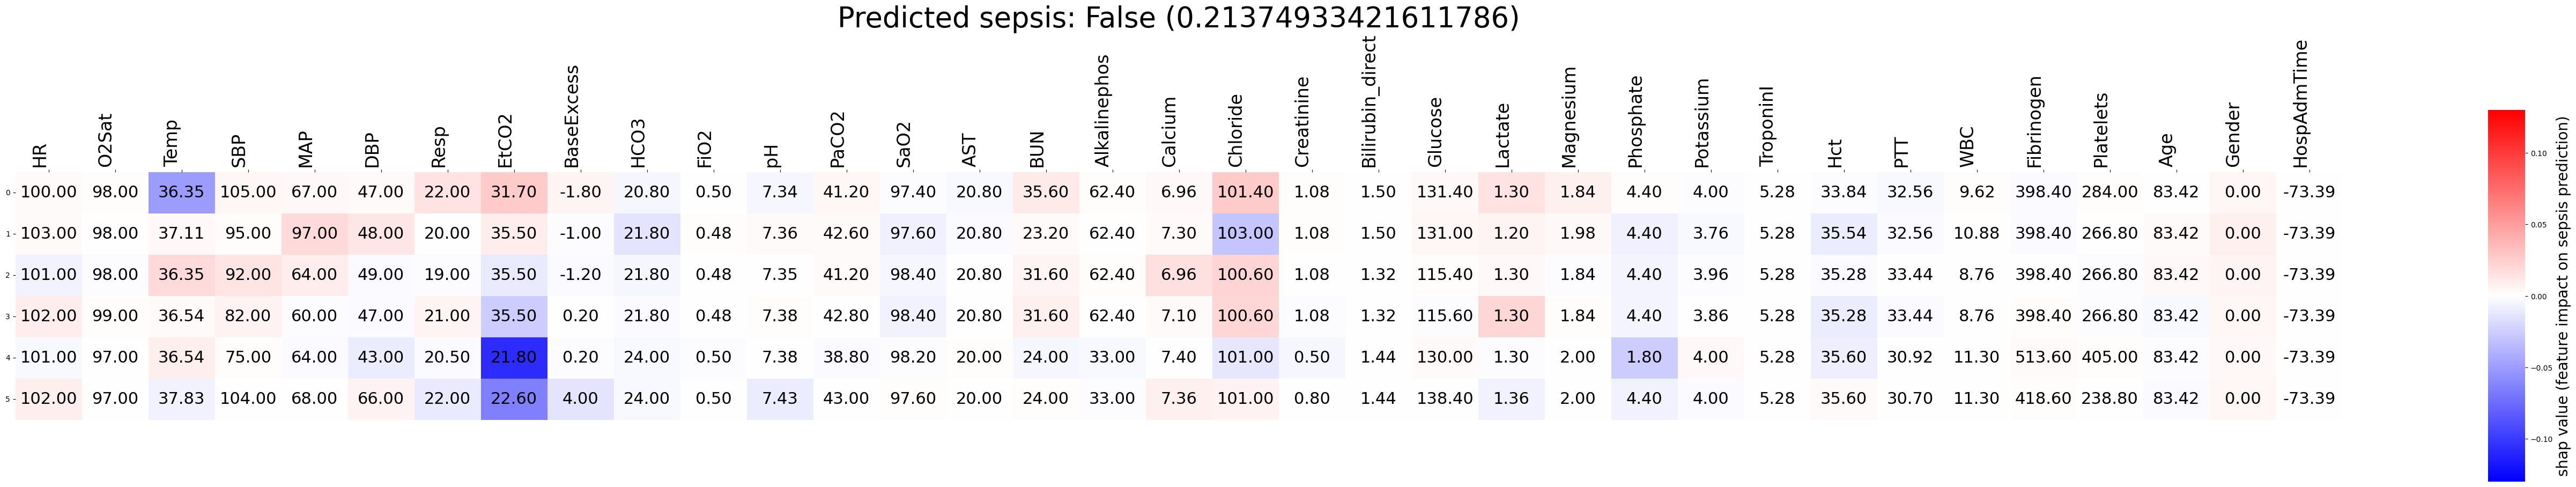

Patient 26, sepsis label: False


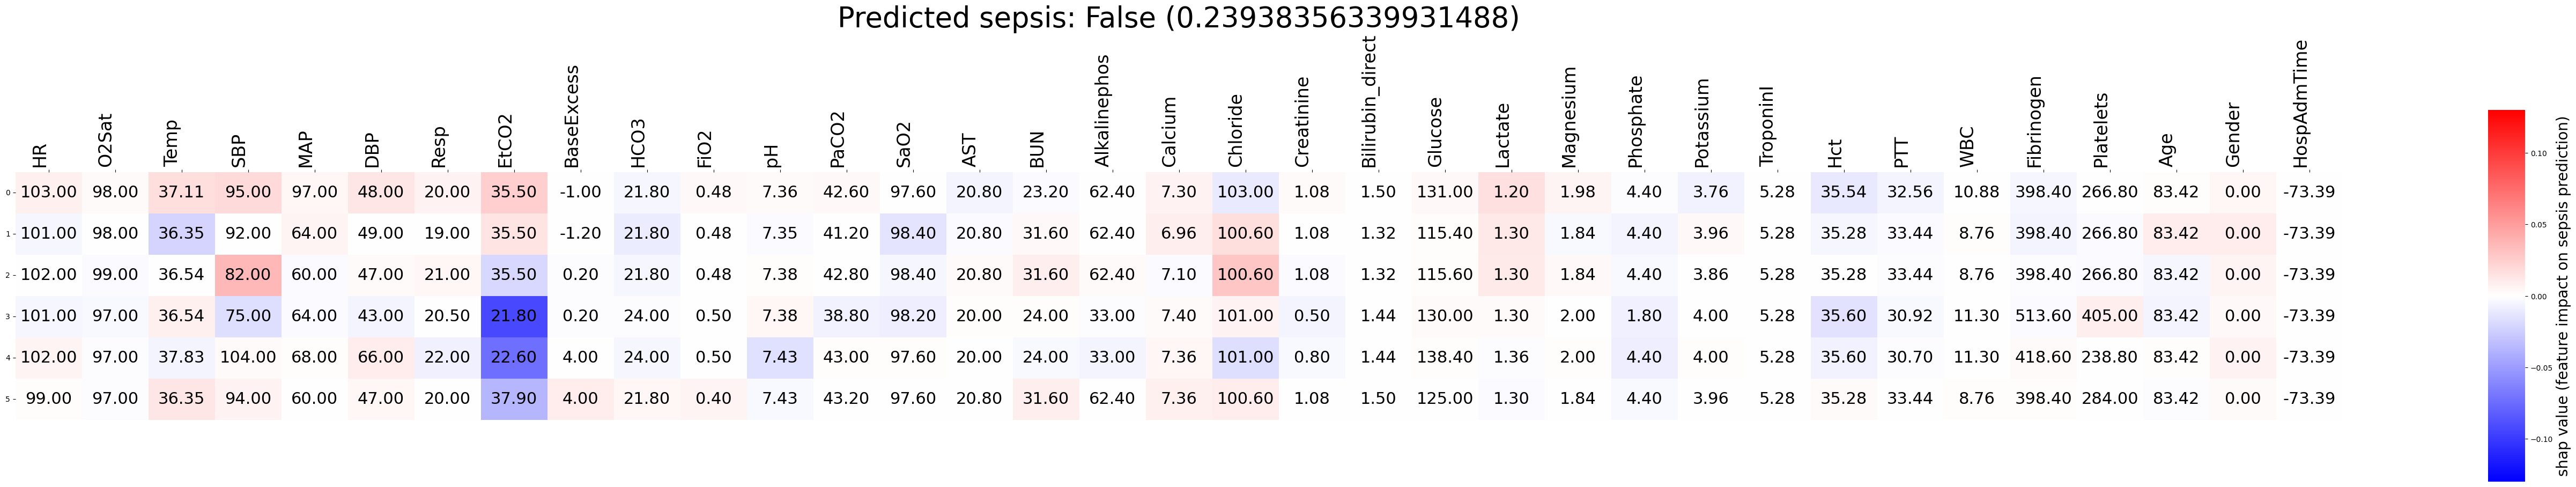

Patient 27, sepsis label: False


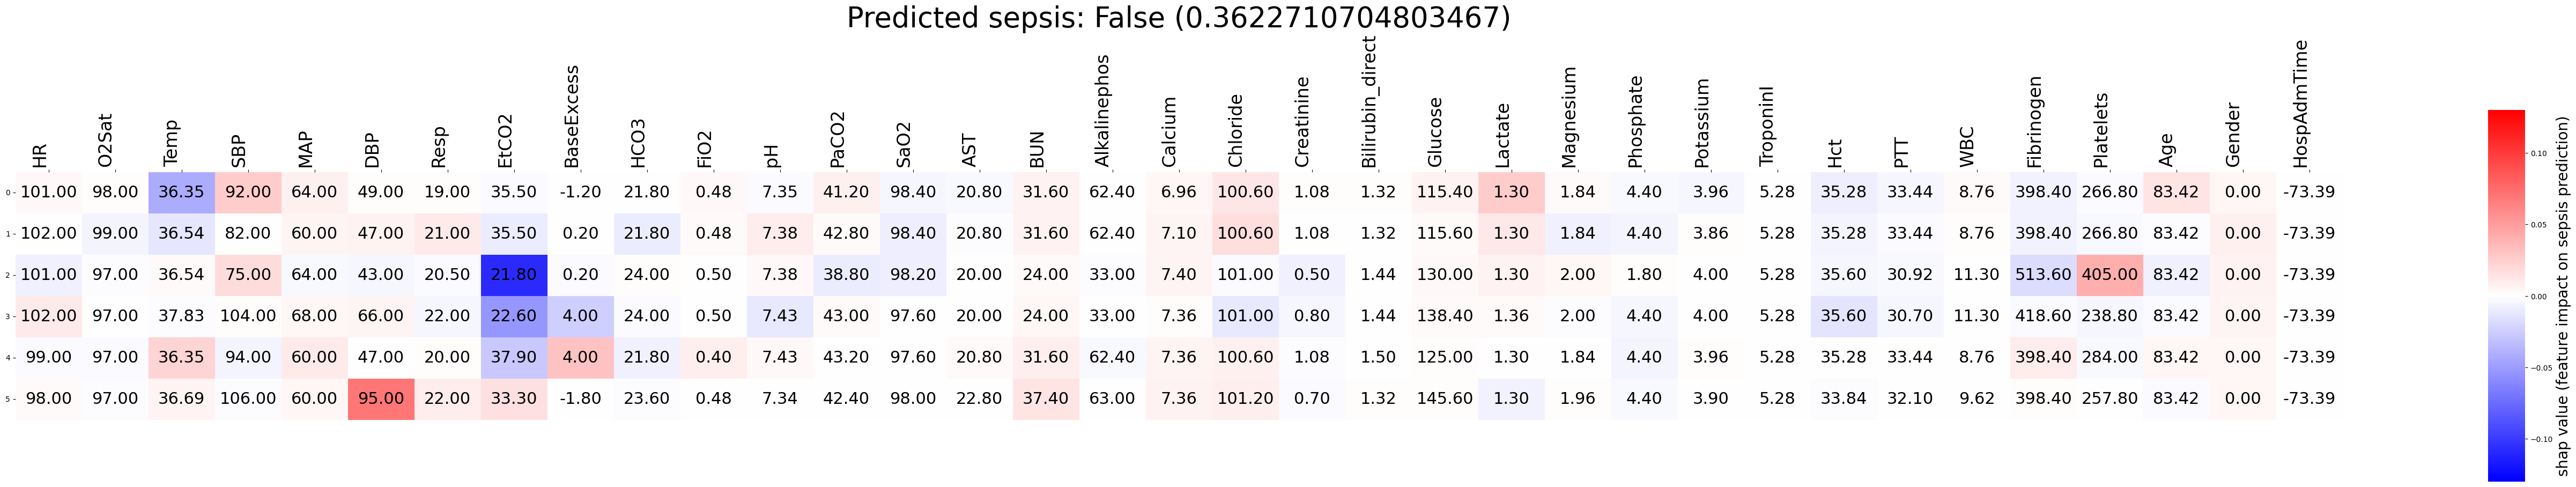

Patient 28, sepsis label: False


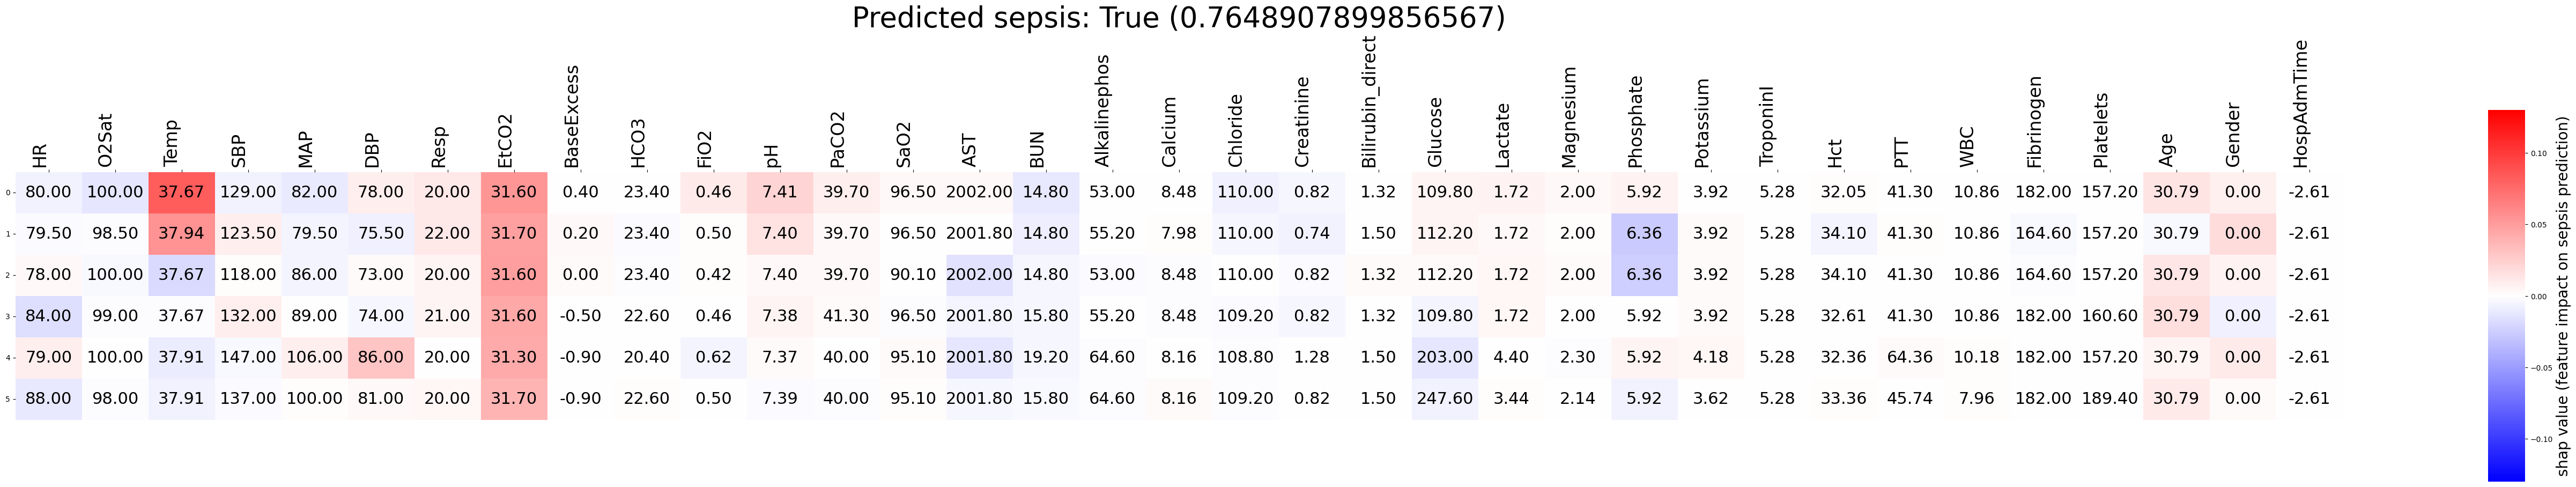

Patient 29, sepsis label: True


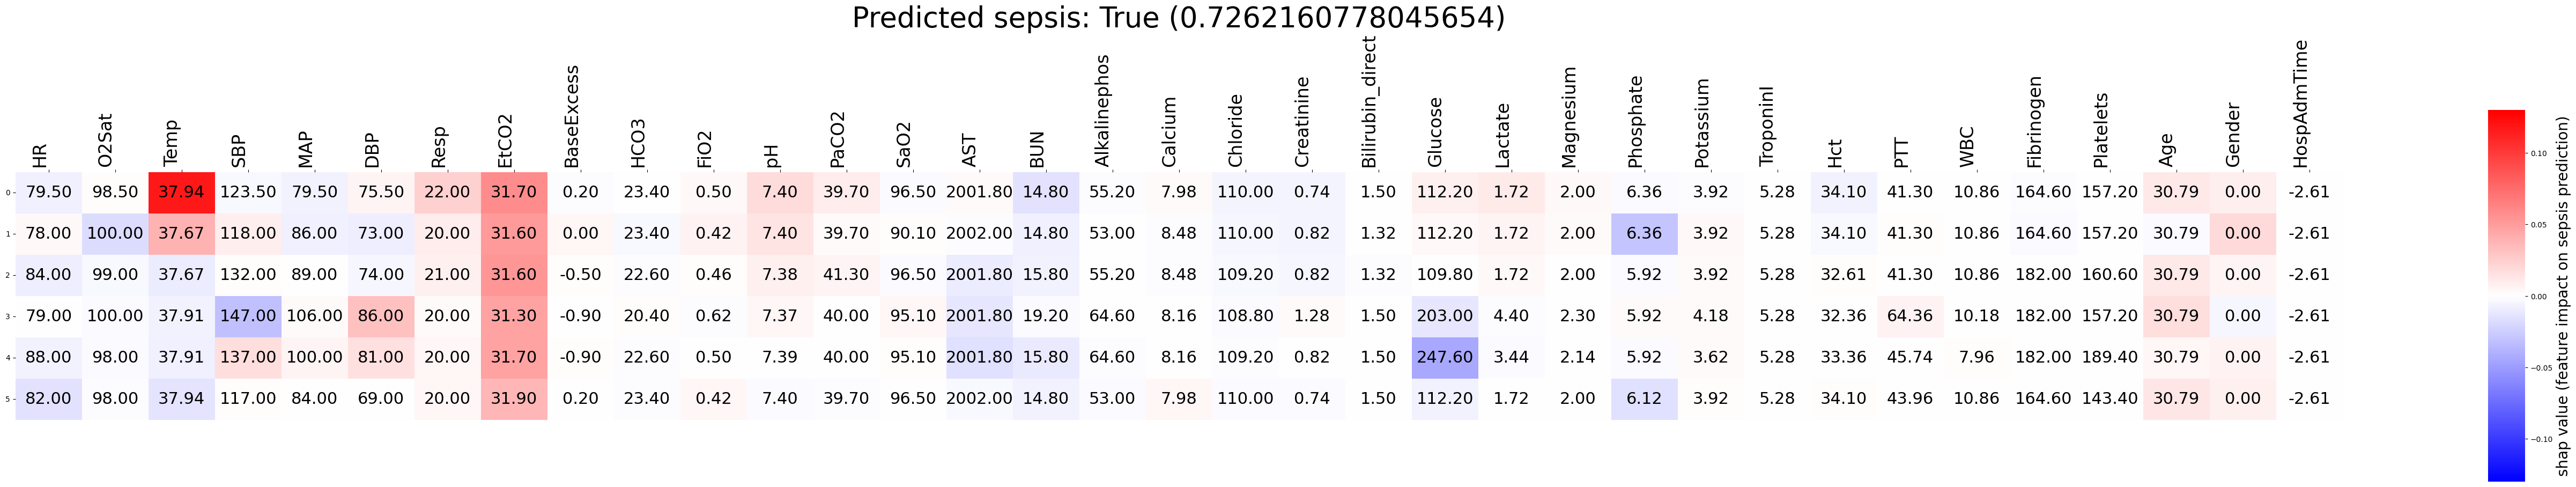

In [83]:
for i in range(25,30):
	# if predictions[i] >= threshold:
	if True:
		print(f"Patient {i}, sepsis label:", bool(labels_test[i]))
		# print("sepsis predicted:", predictions[i] >= threshold, f'({predictions[i]:.4f})')
		data_array = shap_values_all[i]
		text_array = original_sequences[i]
		draw_patient_pred(data_array, text_array, predictions[i], auto_scale=False)

In [84]:
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 6, 35, 64)      │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 17, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 17, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 17, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,361 (403.75 KB)

 Trainable params: 103,361 (403.75 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
shap.dependence_plot(, shap_values_all, data_to_explain, feature_names=features)

SyntaxError: invalid syntax (2100052095.py, line 1)

In [36]:
from pytorch_grad_cam import GradCAM

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [42]:
def display_gradcam(img_array, heatmap, alpha=0.4):
    img = tf.keras.preprocessing.image.array_to_img(img_array[0])
    heatmap = np.uint8(255 * heatmap)

    jet = plt.cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.size[0], img.size[1]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# Example usage:
# Assuming model_cnn is your model and img_array is your input image array
last_conv_layer_name = "conv2d"  # Replace with the name of your last conv layer
img_array = np.expand_dims(original_sequences[27], axis=0)  # Replace 'img' with your input image

heatmap = get_gradcam_heatmap(model_cnn, img_array, last_conv_layer_name)
display_gradcam(img_array, heatmap)

AttributeError: The layer sequential has never been called and thus has no defined output.